In [1]:
import time
import matplotlib.pyplot as plt
import gym

# Method 1: Use local test class

In [2]:
import gym
from gym import spaces
class BasicEnv(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [60]:
# method 1 - use local test class
env = BasicEnv()

We start at state = 0

In [61]:
env.reset()

0

and the agent can choose between 5 actions, numbered 0 to 4.

In [62]:
env.render("human")

In [63]:
action = env.action_space.sample()
print(action)

1


If they pick action = 2, they get a reward of 1, otherwise, the reward is -1. 

In [64]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 1


If we pick action = 2, they get a reward of 1

We just reset the state

In [65]:
env.reset()

0

We can define the action by hand inside the step

In [66]:
action=2
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 1 True {}
Reward = 1 with action = 2


otherwise

In [67]:
action=1
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 1


Once we have lerned how to pass the actions inside the step we can test further enviroments 

In [68]:
import numpy as np
from gym import spaces
# same as BasicEnv, with one difference: the reward for each action is a normal variable
# purpose is to see if we can use libraries

class BasicEnv2(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = gym.spaces.Discrete(5)
        self.observation_space = gym.spaces.Discrete(2)

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        reward = np.random.normal(loc = action, scale = action)
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}

        return state, reward, done, info

    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        pass

    def close(self):
        pass

In [69]:
# method 1 - use local test class
env = BasicEnv2()

In [70]:
env.reset()

0

In [71]:
env.render("human")

In [72]:
action = env.action_space.sample()

In [73]:
print(action)

2


In [74]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 2.789265547053389 True {}
Reward = 2.789265547053389 with action = 2


# Method 2: Build from gym package

Once the Enviroment were created 
``` 
gym-basic/
  setup.py
  gym_basic/
    __init__.py
    envs/
      __init__.py
      basic_env.py
      basic_env_2.py
```

pip install -e gym-basic

In [4]:
import gym
# method 2 - build from gym package
env = gym.make("gym_basic:basic-v0")

In [21]:
env.reset()
env.render("human")
action = env.action_space.sample()
print(action)

0


In [22]:
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 -1 True {}
Reward = -1 with action = 0


In [9]:
action=2
state, reward, done, info = env.step(action)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 1 True {}
Reward = 1 with action = 2


In [31]:
# method 1 - build from gym package
env = gym.make("gym_basic:basic-v2")

In [34]:
env.reset()
env.render("human")

In [35]:
action = env.action_space.sample()
print(action)

3


In [36]:
state, reward, done, info = env.step(1)
print(state,reward, done, info)
print("Reward = {} with action = {}".format(reward,action))

1 3.311051392573194 True {}
Reward = 3.311051392573194 with action = 3


# Rendering - Part 1

The next step is load an image called 
**point_blue.png**, we just pointed the image at one fixed position.

We take the first enviroment **BasicEnv** and we modify as follows:

In [48]:
import gym
from gym import spaces

import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d

# --- New code begin---
BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
# Moreover we add a position in the screen display
worker_rect.topleft = (25, 25)

# --- New code end---  

class BasicEnv3(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # --- New code begin---
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))        
        # --- New code end--- 

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
        
        
        # --- New code begin---        
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        
        state=img
        # --- New code end---
        
        return state, reward, done, info
    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Blit assets ( we add the image to the game window)
        self.game_window.blit(worker_image, worker_rect)
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        state = 0
        return state
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

In [49]:
# method 1 - use local test class
env = BasicEnv3()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))

1


-1 True {}


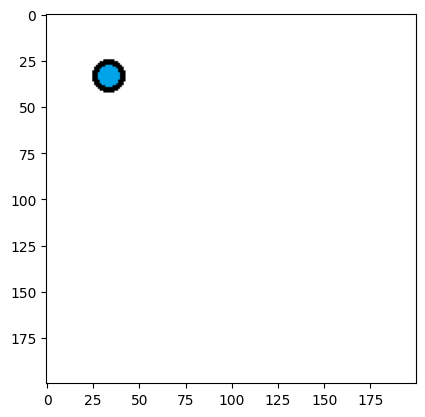

In [51]:
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

# Rendering - Part 2
We are interested now, to add an additional red point that will be the target 


In [16]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
# Moreover we add a position in the screen display
worker_rect.topleft = (25, 25)

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]
target_image = pygame.image.load("point_red.png")
target_rect = target_image.get_rect()
print('Initial position',100,100)
target_rect.center = (100, 100)

class BasicEnv4(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))        
        # --- New code end--- 

    def step(self, action):

        # if we took an action, we were in state 1
        state = 1
    
        if action == 2:
            reward = 1
        else:
            reward = -1
            
        # regardless of the action, game is done after a single step
        done = True

        info = {}
         
              
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
    
        
        return state, reward, done, info
    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        
        #Blit assets ( we add the image to the game window)
        self.game_window.blit(worker_image, worker_rect)
        self.game_window.blit(target_image, target_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        
        
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        target_rect.center = (target_pos[0], target_pos[1])


        state = 0
        return state
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

Initial position 100 100


Target position 150 50
0
Reward = -1 with action = 0
-1 True {}


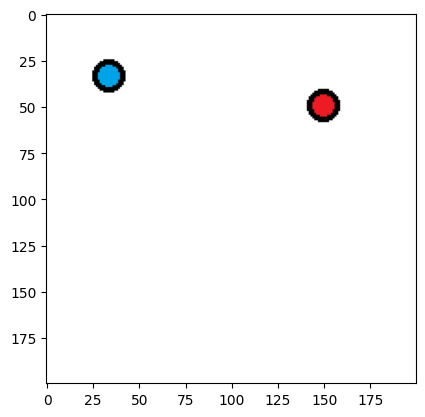

In [21]:
# method 1 - use local test class
env = BasicEnv4()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

# Action - Part 1
We are interested now to add the input to the enviroment, let add just the four keys, up, down, left, right

In [1]:
import gym
from gym import spaces
import numpy as np

import pygame
from pygame import display
from pygame.surfarray import array3d
import random

BLACK = pygame.Color(0, 0, 0)
WHITE = pygame.Color(255, 255, 255)
RED = pygame.Color(255, 0, 0)
GREEN = pygame.Color(0, 255, 0)
BLUE = pygame.Color(0, 0, 255)

#Load images
worker_image = pygame.image.load("point_blue.png")
#To the image we assing a kind of gym object
worker_rect = worker_image.get_rect()
worker_pos=[25,25]
# Moreover we add a position in the screen display
worker_rect.center = (worker_pos[0], worker_pos[1])

#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_image = pygame.image.load("point_red.png")
target_rect = target_image.get_rect()
print('Initial position',100,100)
target_rect.center = (100, 100)

class BasicEnv5(gym.Env):
    metadata = {'render.modes': ['human']}

    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(5)
        self.observation_space = spaces.Discrete(2)
        
        # We inizialize the display
        self.frame_size_x = 200
        self.frame_size_y = 200
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))   
        self.worker_pos=[25,25]
        
        
        #Load images
        self.worker_image = pygame.image.load("point_blue.png")
        #To the image we assing a kind of gym object
        self.worker_rect = worker_image.get_rect()
        self.worker_pos=[25,25]
        # Moreover we add a position in the screen display
        self.worker_rect.center = (worker_pos[0], worker_pos[1])        
        
    
    def step(self, action):
        reward = 0
        self.worker_pos = env.move(action, self.worker_pos)
        #reward = self.seat_handler()
        # regardless of the action, game is done after a single step
        done = True
        info = {}
        # We update the state with an image
        self.update_game_state()
        img = self.get_image_array_from_game()
        state=img
        return state, reward, done, info
    

    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        
        action = None
        
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
        ################################################ 
        ########## CONVERT KEYPRESS TO DIRECTION ###### 
        ############################################## 
        elif event.type == pygame.KEYDOWN:
            
            if event.key == pygame.K_UP:
                action = 'UP'
            if event.key == pygame.K_DOWN:
                action = 'DOWN'
            if event.key == pygame.K_LEFT:
                action = 'LEFT'
            if event.key == pygame.K_RIGHT:
                action = 'RIGHT'
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))
                
        return action    
    
    def update_game_state(self):
        #We fill the screen to white
        self.game_window.fill(WHITE)
        self.worker_rect.x=worker_pos[0]
        self.worker_rect.y=worker_pos[1]
        #Draw rectangles to represent the rect's of each object
        pygame.draw.rect(self.game_window, (0, 255, 0), target_rect, 1)
        pygame.draw.rect(self.game_window, (255, 255, 0), worker_rect, 1)
        #Blit assets
        self.game_window.blit(target_image, target_rect)
        self.game_window.blit(worker_image, worker_rect)
        
        
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
    
    def reset(self):
        target_pos=random.choice(position_coordinates)
        print('Target position',target_pos[0], target_pos[1])
        target_rect.center = (target_pos[0], target_pos[1])
        state = 0
        return state
    
    def move(self,action,worker_pos):
        '''
        Changes direction based on action input.
        Updates Office_pos list to reflect direction change.
        '''
        if action == 'UP':
            worker_pos[1] -= 10
        if action == 'DOWN':
            worker_pos[1] += 10
        if action == 'LEFT':
            worker_pos[0] -= 10
        if action == 'RIGHT':
            worker_pos[0] += 10
        return worker_pos    
    
  
    def render(self, mode='human'):
        if mode == "human":
            display.update()        

    def close(self):
        pass

pygame 2.1.2 (SDL 2.0.18, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html
Initial position 100 100


Target position 100 50
4
Reward = 0 with action = 4
0 True {}


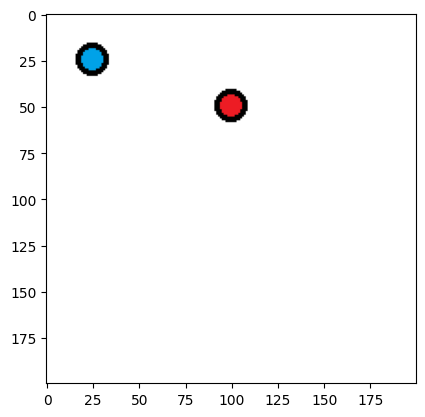

In [3]:
# method 1 - use local test class
env = BasicEnv5()
env.reset()
action = env.action_space.sample()
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
import matplotlib.pyplot as plt
print(reward, done, info)
plt.figure()
plt.imshow(state)

In [5]:
import sys
env = BasicEnv5()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        env.action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False

    #state, reward, done, info = env.step(action)
    #print("Reward = {} with action = {}".format(reward,action))        
   
    # Check for move change based on action and Update worker Position
    worker_pos = env.move(env.action,env.worker_pos)
    print(worker_pos)
    #Draw the Screen
    env.game_window.fill(WHITE)

    #bg = pygame.image.load("background.png")
    #env.game_window.blit(bg, (0, 0))    
        
    worker_rect.x=worker_pos[0]
    worker_rect.y=worker_pos[1]
    # Draw desktop
    
    #Draw rectangles to represent the rect's of each object
    pygame.draw.rect(env.game_window, (0, 255, 0), target_rect, 1)
    pygame.draw.rect(env.game_window, (255, 255, 0), worker_rect, 1)
 
    #Blit assets
    env.game_window.blit(target_image, target_rect)
    env.game_window.blit(worker_image, worker_rect)

    # Check if we lost
    #env.game_over()
    #env.display_score(BLACK, 'consolas', 20)
    # Refresh game screen
    pygame.display.update()
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 25]
[25, 35]
[25, 35]
[25, 35]
[25, 35]
[25, 45]
[25, 45]
[25, 55]
[25, 55]
[25, 65]
[25, 65]
[25, 65]
[25, 65]
[25, 65]
[25, 65]
[35, 65]
[35, 65]
[45, 65]
[45, 65]
[55, 65]
[55, 65]
[65, 65]
[65, 65]
[75, 65]
[85, 65]
[85, 65]
[95, 65]
[95, 65]
[105, 65]
[115, 65]
[115, 65]
[115, 65]
[115, 65]
[105, 65]
[95, 65]
[85, 65]
[75, 65]
[65, 65]
[55, 65]
[45, 65]
[35, 65]
[25, 65]
[35, 65]
[45, 65]
[55, 65]
[65, 65]
[75, 65]
[85, 65]
[95, 65]
[105, 65]
[115, 65]
[125, 65]
[125, 65]
[125, 65]
[125, 65]
[125, 65]
[125, 65]
[125, 65]
[125, 65]
[125, 55]
[125, 45]
[125, 35]
[125, 25]
[125, 15]
[125, 15]
[125, 15]
[125, 15]
[115, 15]
[105, 15]
[95, 15]
[85, 15]
[75, 15]
[65, 15]
[55, 15]
[55, 15]
[55, 15]
[55, 15]
[55, 15]
[55, 15]
[55, 25]
[55, 35]
[55, 45]
[55, 55]
[55, 65]
[55, 75]
[55, 85]
[55, 85]
[55, 85]
[65, 85]
[75, 85]
[8

SystemExit: 